In [ ]:
# @hidden_cell
# The project token is an authorization token that is used to access project resources like data sources, connections, and used by platform APIs.
from project_lib import Project
project = Project(project_id='bee9a452-3dec-4e93-9661-b59081ff79c4', project_access_token='p-173e14c359be5fc0bce471ee0e3d064365888c33')
pc = project.project_context


In [1]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_f57d373fc0a540c8b01dda72da810bf1 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='6MAYXLdjYQMrrR52Gs5eyrTsjE9_XXrLB935-WRcPXgP',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_f57d373fc0a540c8b01dda72da810bf1.get_object(Bucket='predictinglifeexpectancynotebook-donotdelete-pr-436272znu9mxht',Key='Life Expectancy Data.csv.xlsx')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_0 = pd.read_excel(body)
df_data_0.head()


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import statsmodels.api as sm

In [3]:
df_data_0.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [4]:
df_data_0.columns.values

array(['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure',
       'Hepatitis B', 'Measles', 'BMI', 'under-five deaths', 'Polio',
       'Total expenditure', 'Diphtheria', 'HIV/AIDS', 'GDP', 'Population',
       'thinness  1-19 years', 'thinness 5-9 years',
       'Income composition of resources', 'Schooling'], dtype=object)

In [5]:
column_names = ['Country', 'Year', 'Status', 'Life Expectancy', 'Adult Mortality',
       'Infant Deaths', 'Alcohol', 'Percentage Expenditure',
       'Hepatitis B', 'Measles', 'BMI', 'Under-Five Deaths ', 'Polio',
       'Total Expenditure', 'Diphtheria', 'HIV/AIDS', 'GDP',
       'Population', 'Thinness 1-19 years', 'Thinness 5-9 years',
       'Income Composition of Resources', 'Schooling']

In [6]:
df_data_0.columns = column_names
df_data_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
Country                            2938 non-null object
Year                               2938 non-null int64
Status                             2938 non-null object
Life Expectancy                    2928 non-null float64
Adult Mortality                    2928 non-null float64
Infant Deaths                      2938 non-null int64
Alcohol                            2744 non-null float64
Percentage Expenditure             2938 non-null float64
Hepatitis B                        2385 non-null float64
Measles                            2938 non-null int64
BMI                                2904 non-null float64
Under-Five Deaths                  2938 non-null int64
Polio                              2919 non-null float64
Total Expenditure                  2712 non-null float64
Diphtheria                         2919 non-null float64
HIV/AIDS                           2938 non-null

In [7]:
data1 = df_data_0.copy()

In [8]:
data1 = data1.dropna(axis = 0, subset = ['Life Expectancy'])
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2928 entries, 0 to 2937
Data columns (total 22 columns):
Country                            2928 non-null object
Year                               2928 non-null int64
Status                             2928 non-null object
Life Expectancy                    2928 non-null float64
Adult Mortality                    2928 non-null float64
Infant Deaths                      2928 non-null int64
Alcohol                            2735 non-null float64
Percentage Expenditure             2928 non-null float64
Hepatitis B                        2375 non-null float64
Measles                            2928 non-null int64
BMI                                2896 non-null float64
Under-Five Deaths                  2928 non-null int64
Polio                              2909 non-null float64
Total Expenditure                  2702 non-null float64
Diphtheria                         2909 non-null float64
HIV/AIDS                           2928 non-null

In [9]:
data1 = data1.fillna(0)
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2928 entries, 0 to 2937
Data columns (total 22 columns):
Country                            2928 non-null object
Year                               2928 non-null int64
Status                             2928 non-null object
Life Expectancy                    2928 non-null float64
Adult Mortality                    2928 non-null float64
Infant Deaths                      2928 non-null int64
Alcohol                            2928 non-null float64
Percentage Expenditure             2928 non-null float64
Hepatitis B                        2928 non-null float64
Measles                            2928 non-null int64
BMI                                2928 non-null float64
Under-Five Deaths                  2928 non-null int64
Polio                              2928 non-null float64
Total Expenditure                  2928 non-null float64
Diphtheria                         2928 non-null float64
HIV/AIDS                           2928 non-null

In [10]:
data1.head()

,Country,Year,Status,Life Expectancy,Adult Mortality,Infant Deaths,Alcohol,Percentage Expenditure,Hepatitis B,Measles,...,Polio,Total Expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 1-19 years,Thinness 5-9 years,Income Composition of Resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [11]:
data1['Status'].unique()

array(['Developing', 'Developed'], dtype=object)

In [12]:
data1['Status'] = data1['Status'].map({'Developing' : 0, 'Developed' : 1})

In [13]:
data1.head(5)

,Country,Year,Status,Life Expectancy,Adult Mortality,Infant Deaths,Alcohol,Percentage Expenditure,Hepatitis B,Measles,...,Polio,Total Expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 1-19 years,Thinness 5-9 years,Income Composition of Resources,Schooling
0,Afghanistan,2015,0,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,0,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,0,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,0,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,0,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [14]:
data1 = data1.drop(['Country'], axis = 1)
data1.head()

,Year,Status,Life Expectancy,Adult Mortality,Infant Deaths,Alcohol,Percentage Expenditure,Hepatitis B,Measles,BMI,...,Polio,Total Expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 1-19 years,Thinness 5-9 years,Income Composition of Resources,Schooling
0,2015,0,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,2014,0,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,2013,0,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,2012,0,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,2011,0,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [15]:
column_2 = ['Year', 'Status', 'Adult Mortality',
       'Infant Deaths', 'Alcohol', 'Percentage Expenditure',
       'Hepatitis B', 'Measles', 'BMI', 'Under-Five Deaths ', 'Polio',
       'Total Expenditure', 'Diphtheria', 'HIV/AIDS', 'GDP', 'Population',
       'Thinness 1-19 years', 'Thinness 5-9 years',
       'Income Composition of Resources', 'Schooling', 'Life Expectancy']

In [16]:
data1 = data1[column_2]
data1.head()

,Year,Status,Adult Mortality,Infant Deaths,Alcohol,Percentage Expenditure,Hepatitis B,Measles,BMI,Under-Five Deaths,...,Total Expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 1-19 years,Thinness 5-9 years,Income Composition of Resources,Schooling,Life Expectancy
0,2015,0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,...,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,65.0
1,2014,0,271.0,64,0.01,73.523582,62.0,492,18.6,86,...,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,59.9
2,2013,0,268.0,66,0.01,73.219243,64.0,430,18.1,89,...,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,59.9
3,2012,0,272.0,69,0.01,78.184215,67.0,2787,17.6,93,...,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,59.5
4,2011,0,275.0,71,0.01,7.097109,68.0,3013,17.2,97,...,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,59.2


In [17]:
data2 = data1.copy()
data2.head()

,Year,Status,Adult Mortality,Infant Deaths,Alcohol,Percentage Expenditure,Hepatitis B,Measles,BMI,Under-Five Deaths,...,Total Expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 1-19 years,Thinness 5-9 years,Income Composition of Resources,Schooling,Life Expectancy
0,2015,0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,...,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,65.0
1,2014,0,271.0,64,0.01,73.523582,62.0,492,18.6,86,...,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,59.9
2,2013,0,268.0,66,0.01,73.219243,64.0,430,18.1,89,...,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,59.9
3,2012,0,272.0,69,0.01,78.184215,67.0,2787,17.6,93,...,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,59.5
4,2011,0,275.0,71,0.01,7.097109,68.0,3013,17.2,97,...,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,59.2


In [18]:
data3 = data2.copy()
features = data3.iloc[:,:-1]
features.columns.values

array(['Year', 'Status', 'Adult Mortality', 'Infant Deaths', 'Alcohol',
       'Percentage Expenditure', 'Hepatitis B', 'Measles', 'BMI',
       'Under-Five Deaths ', 'Polio', 'Total Expenditure', 'Diphtheria',
       'HIV/AIDS', 'GDP', 'Population', 'Thinness 1-19 years',
       'Thinness 5-9 years', 'Income Composition of Resources',
       'Schooling'], dtype=object)

In [19]:
targets = data3.iloc[:,-1]
targets.shape

(2928,)

In [20]:
features.shape

(2928, 20)

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
train_test_split(features, targets)

[      Year  Status  Adult Mortality  Infant Deaths  Alcohol  \
 330   2005       0             12.0              0     4.56   
 1602  2015       0             61.0              0     0.00   
 969   2008       0            287.0              3     2.79   
 1302  2011       0            139.0              1     3.58   
 511   2000       0             82.0              2     7.60   
 2292  2004       0            186.0              0     7.91   
 1716  2015       0            222.0              1     0.00   
 1229  2004       0            139.0             28     0.01   
 1274  2007       0             68.0              1     2.33   
 1255  2010       1             68.0              0    11.88   
 1966  2008       0            127.0              1     6.74   
 2663  2001       0            194.0              0     4.55   
 66    2013       0            133.0              0     8.58   
 561   2014       0             86.0            171     5.78   
 224   2015       0            196.0    

In [23]:
x_train, x_test, y_train, y_test = train_test_split(features, targets, train_size = 0.8, random_state = 20)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [24]:
print(x_train.shape, y_train.shape)

(2342, 20) (2342,)


In [25]:
print(x_test.shape, y_test.shape)

(586, 20) (586,)


In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
regression = LinearRegression()
regression.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [28]:
regression.coef_

array([ 6.11217045e-02,  2.92092115e+00, -2.03486998e-02,  1.21095577e-01,
        1.76670904e-01,  7.94852561e-06,  5.74931632e-03, -8.70659320e-06,
        5.57853065e-02, -8.93165372e-02,  3.40950952e-02, -5.21168669e-03,
        2.88166941e-02, -4.68184822e-01,  5.65094193e-05, -1.37822158e-09,
       -9.00720648e-02, -6.32465761e-02,  3.76677195e+00,  2.29743324e-01])

In [29]:
regression.intercept_

-62.53656799545598

In [30]:
regression.score(x_train, y_train)

0.7929831175528261

In [31]:
prediction = regression.predict(x_test)

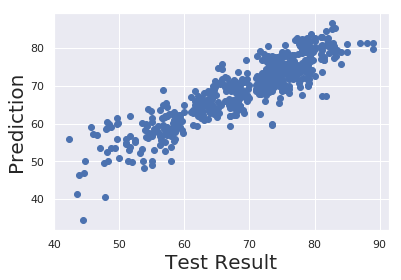

In [32]:
plt.scatter(y_test, prediction)
plt.xlabel('Test Result', fontsize = 20)
plt.ylabel('Prediction', fontsize = 20)
plt.show()

In [33]:
regression.score(x_test, y_test)

0.8012631565938626

In [34]:
!pip install watson-machine-learning-client

In [35]:
from watson_machine_learning_client import WatsonMachineLearningAPIClient

2020-06-11 16:54:56,273 - watson_machine_learning_client.metanames - WARNING - 'AUTHOR_EMAIL' meta prop is deprecated. It will be ignored.


In [36]:
wml_credentials={
  "apikey": "8TLFAIPpZbaIvTZDd-rhaowdf-VcPZnrMiY8EFmqjKC6",
  "instance_id": "25673d21-fefd-4fe2-8394-82dbc908c5b9",
  "url": "https://us-south.ml.cloud.ibm.com"
}

In [37]:
client = WatsonMachineLearningAPIClient( wml_credentials )

In [38]:
model_props = {client.repository.ModelMetaNames.AUTHOR_NAME: "Aadhithya", 
               client.repository.ModelMetaNames.AUTHOR_EMAIL: "19ec001@kpriet.ac.in", 
               client.repository.ModelMetaNames.NAME: "Predict Life Expectancy"}

In [39]:
model_artifact =client.repository.store_model(regression, meta_props=model_props)

In [40]:
published_model_uid = client.repository.get_model_uid(model_artifact)

In [41]:
published_model_uid

'3e0b5bb4-5243-471b-9b1d-0e71edea7a2c'

In [42]:
deployment = client.deployments.create(published_model_uid, name="Predict Life Expectancy")



#######################################################################################

Synchronous deployment creation for uid: '3e0b5bb4-5243-471b-9b1d-0e71edea7a2c' started

#######################################################################################


INITIALIZING
DEPLOY_SUCCESS


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='6bc24d2a-2bbd-45e1-a493-cd50deaae7d4'
------------------------------------------------------------------------------------------------




In [45]:
scoring_endpoint = client.deployments.get_scoring_url(deployment)
scoring_endpoint

'https://us-south.ml.cloud.ibm.com/v3/wml_instances/25673d21-fefd-4fe2-8394-82dbc908c5b9/deployments/6bc24d2a-2bbd-45e1-a493-cd50deaae7d4/online'